In [ ]:
# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)
model.evaluate(x_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.9186 - loss: 0.2630 - val_accuracy: 0.9887 - val_loss: 0.0449
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9888 - val_loss: 0.0371
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9920 - val_loss: 0.0373
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9954 - loss: 0.0125 - val_accuracy: 0.9887 - val_loss: 0.0425
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9881 - loss: 0.0416


[0.033600375056266785, 0.9902999997138977]

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "I love my new Apple iPhone! Samsung phones are great too."
doc = nlp(text)

print("Named Entities:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)

# Simple sentiment rule
if "love" in text or "great" in text:
    sentiment = "Positive"
else:
    sentiment = "Negative"
print("Sentiment:", sentiment)


Named Entities:
Apple - ORG
Samsung - ORG
Sentiment: Positive


In [ ]:
# --- Step 1: Import libraries ---
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# --- Step 2: Load MNIST dataset ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# --- Step 3: Build a simple neural network ---
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# --- Step 4: Compile the model ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Step 5: Train the model ---
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# --- Step 6: Evaluate model ---
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# --- Step 7: Save model to file ---
model.save('mnist_model.h5')
print("💾 Model saved successfully as 'mnist_model.h5'")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8650 - loss: 0.4688 - val_accuracy: 0.9663 - val_loss: 0.1186
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9610 - loss: 0.1332 - val_accuracy: 0.9737 - val_loss: 0.0953
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9748 - loss: 0.0838 - val_accuracy: 0.9768 - val_loss: 0.0819
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0601 - val_accuracy: 0.9745 - val_loss: 0.0775
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9790 - val_loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0933


✅ Test Accuracy: 0.9756
💾 Model saved successfully as 'mnist_model.h5'


In [ ]:
from google.colab import files
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

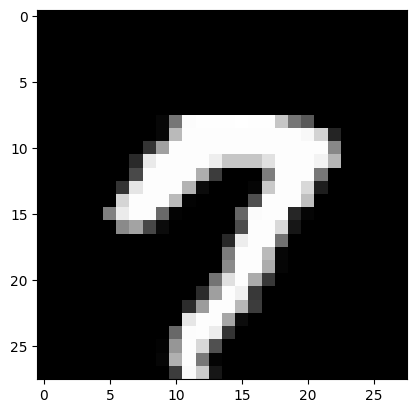

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted digit: 7


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random test image
idx = np.random.randint(0, len(x_test))
img = x_test[idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.show()

pred = model.predict(img.reshape(1, 28, 28, 1))
print("Predicted digit:", np.argmax(pred))


In [ ]:
# --- Step 1: Import libraries ---
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# --- Step 2: Load MNIST dataset ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# --- Step 3: Build a simple neural network ---
mnist_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# --- Step 4: Compile the model ---
mnist_nn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# --- Step 5: Train the model ---
history = mnist_nn.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# --- Step 6: Evaluate model ---
test_loss, test_acc = mnist_nn.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# --- Step 7: Save model to file ---
mnist_nn.save('mnist_model.h5')
print("💾 Model saved successfully as 'mnist_model.h5'")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8718 - loss: 0.4484 - val_accuracy: 0.9675 - val_loss: 0.1204
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9611 - loss: 0.1299 - val_accuracy: 0.9758 - val_loss: 0.0879
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0830 - val_accuracy: 0.9742 - val_loss: 0.0858
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0576 - val_accuracy: 0.9773 - val_loss: 0.0793
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9755 - val_loss: 0.0858
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0970


✅ Test Accuracy: 0.9740
💾 Model saved successfully as 'mnist_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/tmp/ipython-input-2521344115.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


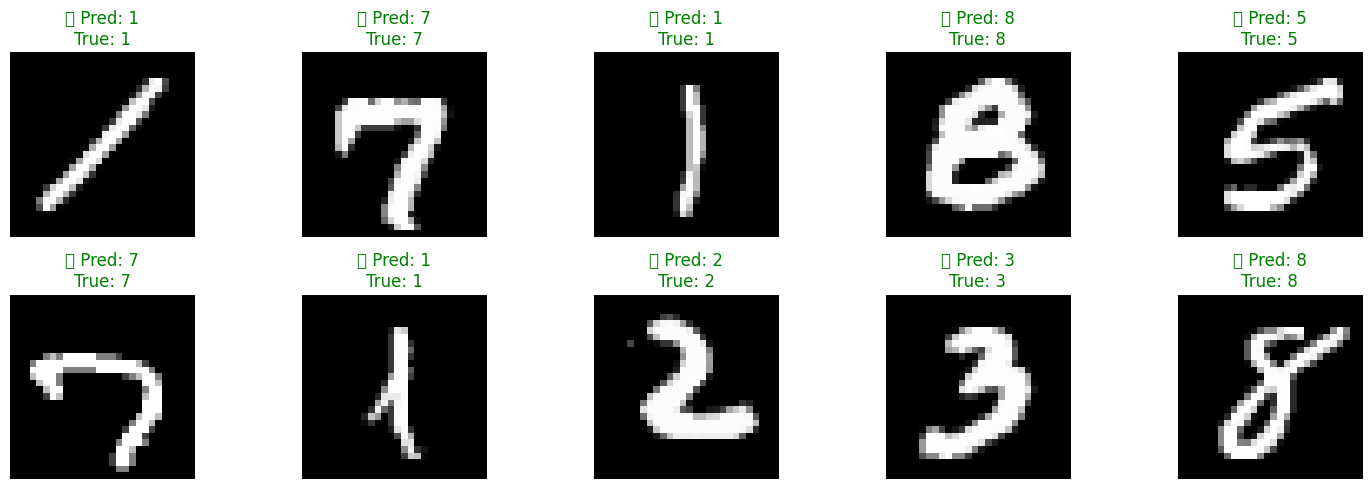

✅ Correct: 10/10 — Accuracy: 100.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Ensure labels are integers for comparison ---
true_labels = np.argmax(y_test, axis=1)  # convert one-hot back to integers

# --- Pick 10 random test images ---
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
images = x_test[indices]
labels = true_labels[indices]

# --- Predict using mnist_nn ---
predictions = mnist_nn.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# --- Plot images with color-coded titles ---
plt.figure(figsize=(15, 5))
correct_count = 0

for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    correct = predicted_labels[i] == labels[i]
    if correct:
        correct_count += 1
    color = 'green' if correct else 'red'
    symbol = "✅" if correct else "❌"

    plt.title(f"{symbol} Pred: {predicted_labels[i]}\nTrue: {labels[i]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Mini-summary ---
print(f"✅ Correct: {correct_count}/{num_samples} — Accuracy: {correct_count/num_samples*100:.1f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


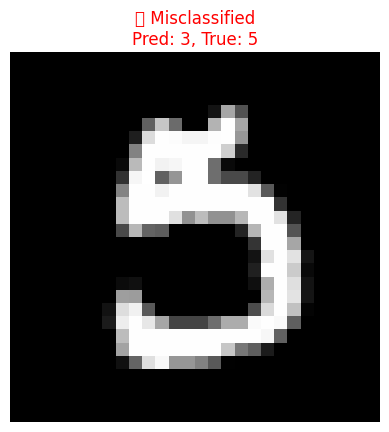

❌ Misclassified sample at index 4255: Predicted 3, True 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot labels back to integers
true_labels = np.argmax(y_test, axis=1)

# Predict on the full test set
predictions = mnist_nn.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Find indices where predictions are wrong
misclassified_indices = np.where(predicted_labels != true_labels)[0]

if len(misclassified_indices) == 0:
    print("✅ All predictions are correct (rare!).")
else:
    # Pick one random misclassified image
    idx = np.random.choice(misclassified_indices)
    img = x_test[idx]
    true_label = true_labels[idx]
    pred_label = predicted_labels[idx]

    # Plot the misclassified image
    plt.imshow(img, cmap='gray')
    plt.title(f"❌ Misclassified\nPred: {pred_label}, True: {true_label}", color='red')
    plt.axis('off')
    plt.show()

    print(f"❌ Misclassified sample at index {idx}: Predicted {pred_label}, True {true_label}")


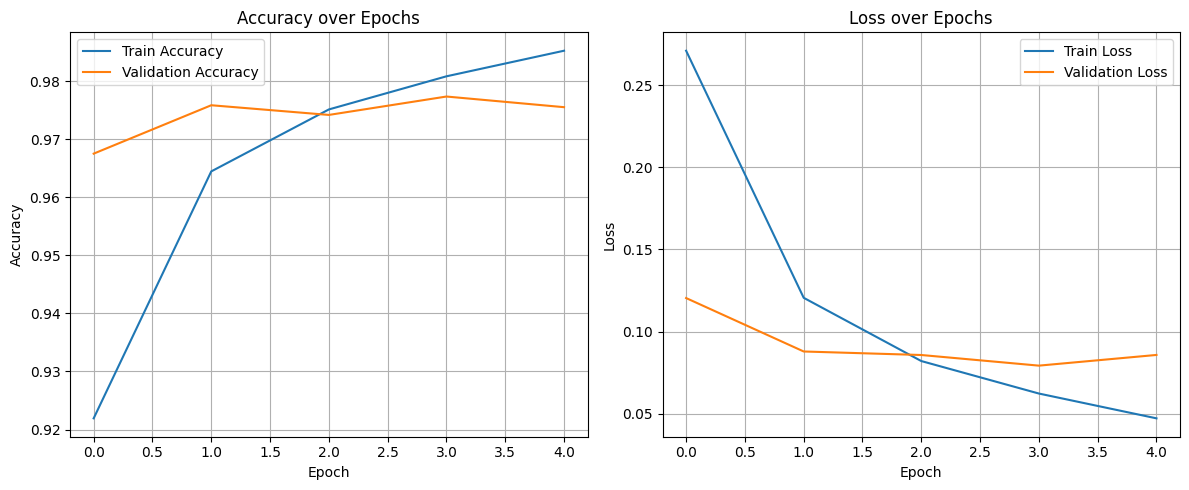

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


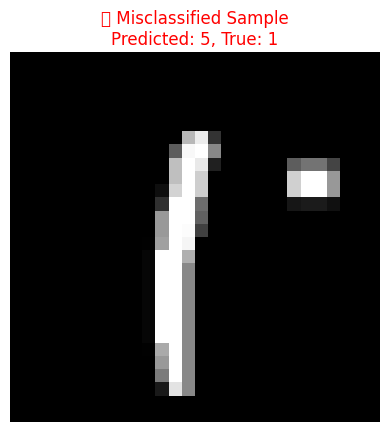

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Plot training & validation accuracy and loss ---
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 2. Show a misclassified sample ---
# Convert one-hot labels back to integers
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(mnist_nn.predict(x_test), axis=1)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels != true_labels)[0]

if len(misclassified_indices) > 0:
    idx = np.random.choice(misclassified_indices)
    img = x_test[idx]
    plt.imshow(img, cmap='gray')
    plt.title(f"❌ Misclassified Sample\nPredicted: {predicted_labels[idx]}, True: {true_labels[idx]}", color='red')
    plt.axis('off')
    plt.show()
else:
    print("✅ No misclassified samples found!")


In [ ]:
# --- Step 1: Import spaCy ---
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# --- Step 2: Sample Amazon product reviews ---
reviews = [
    "I love my new Apple iPhone! It works perfectly.",
    "The Samsung Galaxy tablet is great, but the battery life is short.",
    "I am disappointed with the Sony headphones. Sound quality is poor.",
    "Amazing quality from Bose! Totally worth the price."
]

# --- Step 3: Process reviews with spaCy ---
for idx, text in enumerate(reviews):
    doc = nlp(text)

    # Named Entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Simple rule-based sentiment
    positive_words = ["love", "great", "amazing", "perfectly", "worth"]
    negative_words = ["poor", "disappointed", "short", "bad"]

    text_lower = text.lower()
    if any(word in text_lower for word in positive_words):
        sentiment = "Positive"
    elif any(word in text_lower for word in negative_words):
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # --- Step 4: Display results ---
    print(f"\nReview {idx+1}: {text}")
    print("Named Entities:", entities)
    print("Sentiment:", sentiment)



Review 1: I love my new Apple iPhone! It works perfectly.
Named Entities: [('Apple', 'ORG')]
Sentiment: Positive

Review 2: The Samsung Galaxy tablet is great, but the battery life is short.
Named Entities: []
Sentiment: Positive

Review 3: I am disappointed with the Sony headphones. Sound quality is poor.
Named Entities: [('Sony', 'ORG')]
Sentiment: Negative

Review 4: Amazing quality from Bose! Totally worth the price.
Named Entities: [('Bose', 'NORP')]
Sentiment: Positive


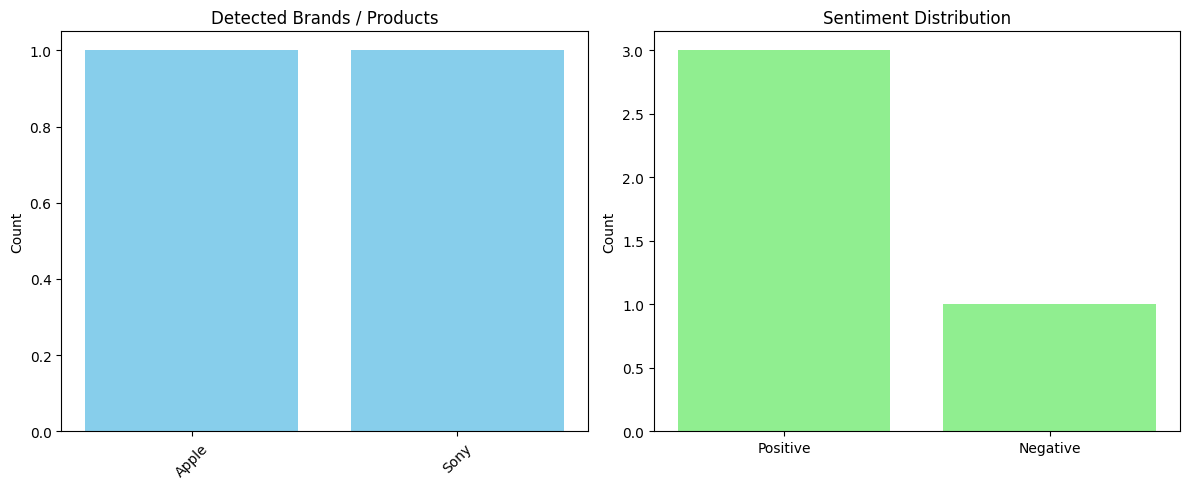

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import spacy

# --- Load spaCy model ---
nlp = spacy.load("en_core_web_sm")

# --- Sample reviews ---
reviews = [
    "I love my new Apple iPhone! It works perfectly.",
    "The Samsung Galaxy tablet is great, but the battery life is short.",
    "I am disappointed with the Sony headphones. Sound quality is poor.",
    "Amazing quality from Bose! Totally worth the price."
]

# --- Extract entities and sentiment ---
entities_list = []
sentiments = []

positive_words = ["love", "great", "amazing", "perfectly", "worth"]
negative_words = ["poor", "disappointed", "short", "bad"]

for text in reviews:
    doc = nlp(text)

    # Extract brand/product entities (all ORG and PRODUCT entities)
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT"]:
            entities_list.append(ent.text)

    # Simple rule-based sentiment
    text_lower = text.lower()
    if any(word in text_lower for word in positive_words):
        sentiments.append("Positive")
    elif any(word in text_lower for word in negative_words):
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

# --- 1. Plot Entity Distribution ---
entity_counts = Counter(entities_list)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.title("Detected Brands / Products")
plt.ylabel("Count")
plt.xticks(rotation=45)

# --- 2. Plot Sentiment Distribution ---
sentiment_counts = Counter(sentiments)

plt.subplot(1, 2, 2)
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color='lightgreen')
plt.title("Sentiment Distribution")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
